### Implementing simple Chatbot Using LangGraph

In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [4]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

APIConnectionError: Connection error.

In [6]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="qwen-qwq-32b")
llm_groq.invoke("Hey I am rehaman and i like to play cricket")

AIMessage(content="\n<think>\nOkay, the user is Rehaman and he likes to play cricket. Let me start by greeting him and acknowledging his interest. I should make sure to keep the tone friendly and open. Maybe I can ask him a few questions to get the conversation going. Let me think, what are some common topics people talk about regarding cricket? Maybe his favorite team or player, the positions he plays, or any memorable matches he's been part of. I should ask those to encourage him to share more. Also, I need to check if there's anything else he wants to discuss related to cricket or if he has other interests. Let me make sure the response is engaging and invites him to elaborate.\n\nWait, I should also be careful not to make the questions too long or overwhelming. Keep it natural. Alright, here's a draft: respond warmly, mention cricket, ask about favorite team/players, his role in the game, and if he has any memorable experiences. Offer to discuss tips or strategies too. That should 

### We Will start With Creating Nodes

In [7]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

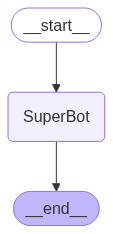

In [8]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile()


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [9]:
## Invocation

graph_builder.invoke({'messages':"Hi,My name is rehaman And I like cricket"})

{'messages': [HumanMessage(content='Hi,My name is rehaman And I like cricket', additional_kwargs={}, response_metadata={}, id='674b1276-f62e-4d59-a99b-ca0b48b47408'),
  AIMessage(content='\n<think>\nOkay, the user introduced themselves as Rehaman and mentioned they like cricket. I should respond in a friendly way. Let me start by greeting them back and acknowledging their name. Then, since they mentioned cricket, I can ask them about their interest in the sport. Maybe they\'re a fan of a particular team or player? I should keep the tone conversational and open-ended to encourage them to share more. Oh, and make sure to use proper punctuation and keep it natural. Let me put that together.\n\nWait, did I spell their name right? They wrote "rehaman" but maybe it\'s Rehaman with a capital R. I\'ll use that. Also, should I mention any recent cricket events? Maybe not necessary unless they bring it up. Just a simple, friendly response should be good. Alright, let me draft the response now.\n

#### Streaming The responses

In [18]:
for event in graph_builder.stream({"messages":"Hello My name is KRish"}):
    print(event)

{'SuperBot': {'messages': [AIMessage(content="Hello Krish! It's nice to meet you. How can I assist you today? Is there anything specific you would like to talk about or any questions you have?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 34, 'prompt_tokens': 35, 'total_tokens': 69, 'completion_time': 0.17, 'prompt_time': 0.003981866, 'queue_time': 0.226247007, 'total_time': 0.173981866}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'stop', 'logprobs': None}, id='run-cb7964d1-a9df-477e-b016-539ee446c375-0', usage_metadata={'input_tokens': 35, 'output_tokens': 34, 'total_tokens': 69})]}}
